In [1]:
!pip install xgboost

In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [5]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)

In [7]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [9]:
train_set.columns = col_labels
test_set.columns = col_labels

In [11]:
data = pd.concat([train_set, test_set], ignore_index=True)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
for col in data.columns:
    data[col] = data[col].str.strip() if data[col].dtype == 'object' else data[col]

In [17]:
# Encode target variable
data['wage_class'] = data['wage_class'].apply(lambda x: 1 if x == '>50K' or x == '>50K.' else 0)

In [19]:
# Fill missing values and encode categorical variables
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna('Unknown')
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [21]:
train_set = data[:train_set.shape[0]]
test_set = data[train_set.shape[0]:]

In [27]:
X_train = train_set.drop('wage_class', axis=1)
y_train = train_set['wage_class']
X_test = test_set.drop('wage_class', axis=1)
y_test = test_set['wage_class']# Convert data to DMatrix for XGBoost

In [29]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [31]:
# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'logloss'
}

# Train the model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

In [33]:
# Predict on the test set
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8703396597260611

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.76      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.80      0.81     16281
weighted avg       0.87      0.87      0.87     16281



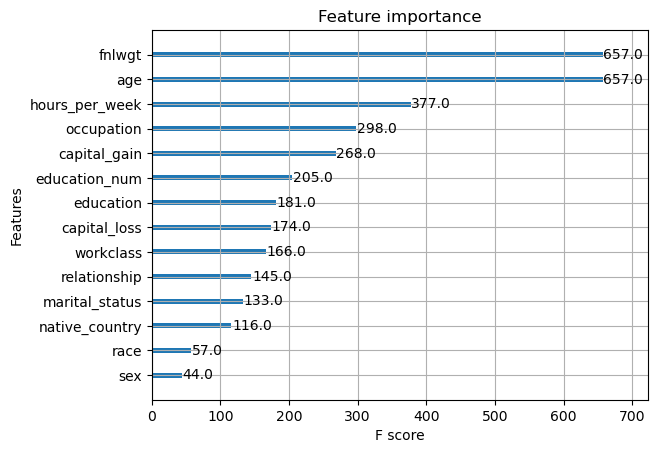

In [47]:
# Plot feature importance
xgb.plot_importance(bst)
plt.show()